# Explaining Models with Shap

- Robert Yonce
- 5/25/23

# Imports

In [1]:
# Importing joblib

import joblib

loaded = joblib.load('salesmodel_l01.joblib')
loaded.keys()

dict_keys(['preprocessor', 'X_train', 'X_test', 'y_train', 'y_test', 'LinearRegression', 'DecisionTree'])

In [2]:
X_train_df = loaded['X_train']
y_train = loaded['y_train']
X_test_df = loaded['X_test']
y_test = loaded['y_test']
preprocessor = loaded['preprocessor']
dec_tree = loaded['DecisionTree']

In [3]:
# Import shap and initialize javascript:

import shap
shap.initjs()

# Creating Samples

In [5]:
# Taking a sample

X_shap = shap.sample(X_train_df,nsamples=400,random_state=321)
X_shap.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Weight,Item_Visibility,Item_MRP
3888,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.708921,0.873252,-1.677139
2497,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.531075,0.418566,1.275305
7723,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.100183,-0.986085,0.684178
8117,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.488577,-0.316610,1.616527
7475,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.507362,-0.410893,-0.023898


In [6]:
# Get the corresponding y-values
y_shap = y_train.loc[X_shap.index]
y_shap 

3888     759.0120
2497     663.1368
7723    2766.3990
8117    1225.0720
7475    1685.8056
          ...    
292     1379.5376
3035    2956.1520
6832    1259.6936
8455    4206.5244
7795     605.8780
Name: Item_Outlet_Sales, Length: 400, dtype: float64

# Explainer and SHAP values

In [7]:
# Creating Explainer

explainer = shap.Explainer(dec_tree)
explainer

In [8]:
# Getting the shap values

shap_values = explainer(X_shap,y_shap)
type(shap_values)

shap._explanation.Explanation

# SHAP Graph

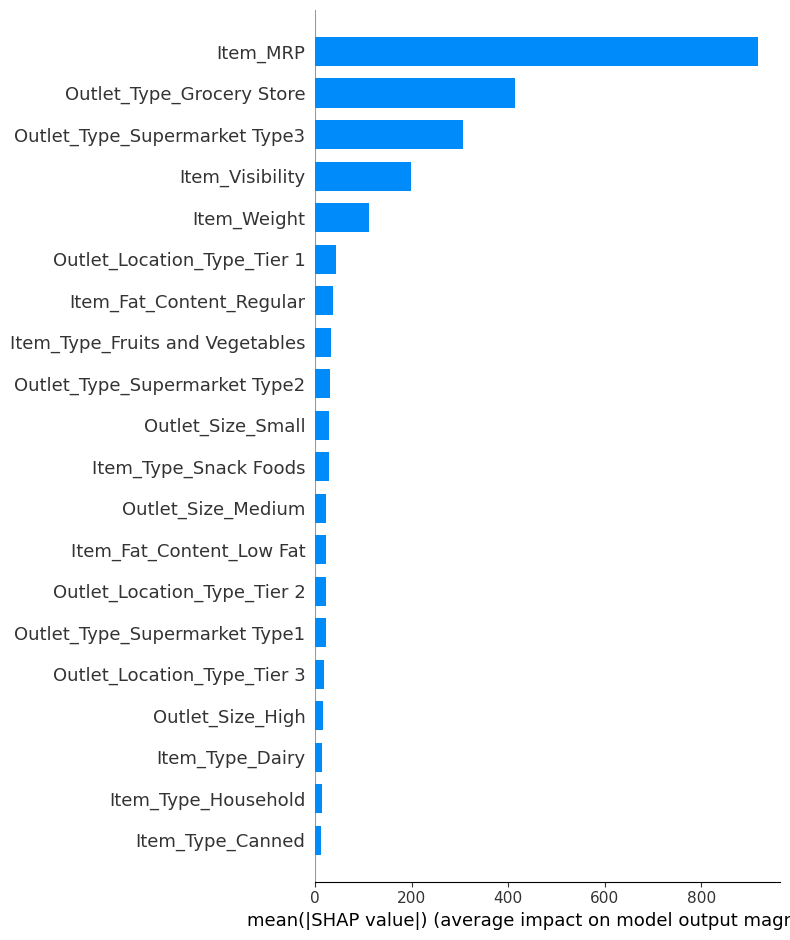

In [12]:
# Shap graph

shap.summary_plot(shap_values,features= X_shap, plot_type='bar')

![](DecTree.png)

- Are they the same features in both? If not, what's different?

    - The top 4 are all the same with just Item Visibility and Supermarket Type 3 switching places.
    
    - After that, it varies quite a bit with each one bringing different features for the last 6 spots

# Dot Graph

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


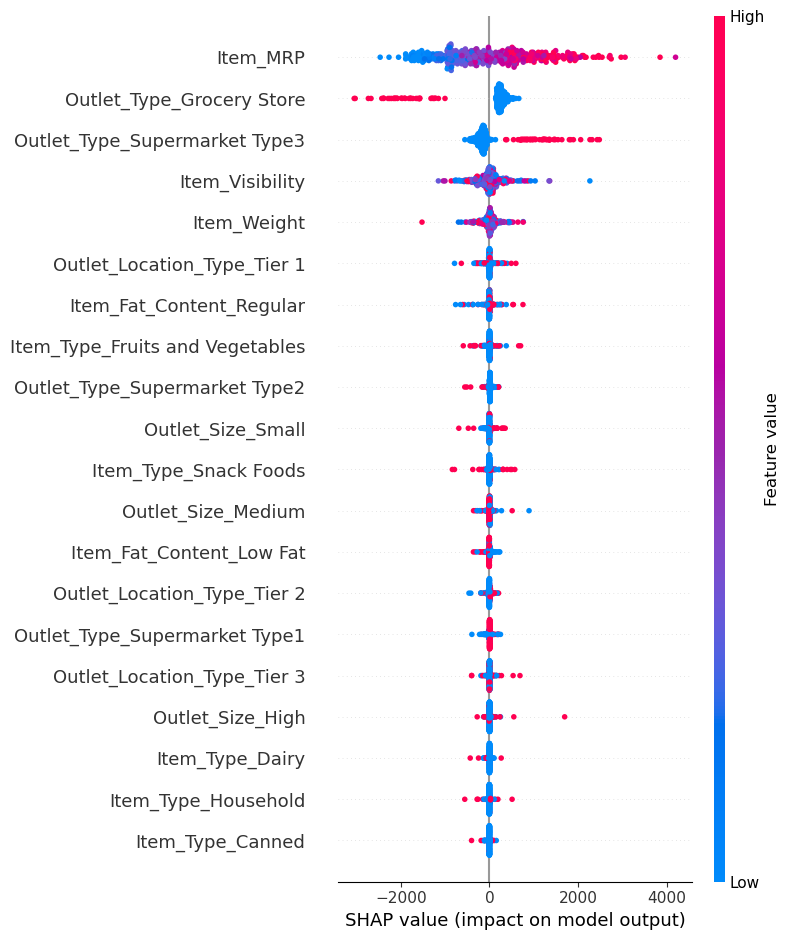

In [13]:
# Dot version

shap.summary_plot(shap_values,X_shap)

- Top 3 Features

    - Item MRP: This shows that a higher MRP will increase our target.
    
    - Outlet Type Grocery Store: This shows that being classified as a Grocery Store decrease our target.
    
    - Outlet Type Supermarket Type3: This shows that being classified as a Supermarket Type3 increase our target.